# Week 4 Lecture 
This week we will cover the following topics
- Histograms
- Groups
- Pivots and Joins
- Functions
- Application to a column

First run the code cell below.

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [2]:
# Read in the table top_movies_2017.csv (Top movies in 2017)
top = Table.read_table( 'top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
Star Wars,Fox,"460,998,007","1,583,483,200",1977
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
Titanic,Paramount,"658,672,302","1,204,368,000",1997
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
Jaws,Universal,"260,000,000","1,138,620,700",1975
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [4]:
# Create a column call T_Gross assign Gross/1000000 to it
top = top.with_columns('T_Gross', top.column('Gross')/1e06
)
top

Title,Studio,Gross,Gross (Adjusted),Year,T_Gross
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939,198.676
Star Wars,Fox,"460,998,007","1,583,483,200",1977,460.998
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965,158.671
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982,435.111
Titanic,Paramount,"658,672,302","1,204,368,000",1997,658.672
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956,65.5
Jaws,Universal,"260,000,000","1,138,620,700",1975,260
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965,111.722
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973,232.906
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937,184.925


In [5]:
# Create bins from data and create a histogram
bmin = int(top.column('T_Gross').min())       # finds the minimum value of the T_Gross column
bmax = int(1+ top.column('T_Gross').max())    # finds the maximum value of the T_Gross column
bw = int((bmax - bmin)/10)                    # Determines the range and divides by 10 to determine 10 bins of equal size
hbins = np.arange(bmin, bmax+bw,bw)           # Starts at the integer below the minimum value up to bmax + bin width to include all values

In [6]:
bmin, bmax

(9, 937)

In [7]:
hbins

array([   9,  101,  193,  285,  377,  469,  561,  653,  745,  837,  929,
       1021])

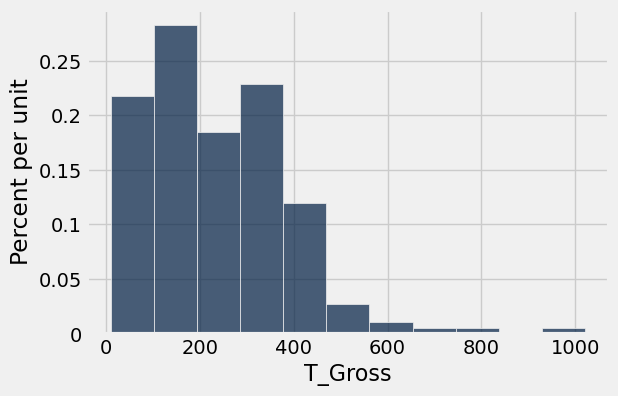

In [8]:
# Create a histogram of T_Gross using the hbins
top.hist('T_Gross', bins=hbins)               # Creates a histogram of the T_Gross using the bins created

# Functions
A small snippet of code that can be used over and over again.  

```
def function_name(x):
    """Description of function"""
    return y
```
You must first define the function before you use it.  Give it a name that describes what it does then within the function describe what it does.  This helps others who view your function understand what it does or you forget it is a reminder.<br>

Write a function that multiples a number by 7 and return that value in one code cell.  Then run it for the x values of 3, 6, 9 in other code cell.

In [9]:
# define a function that multiples entry x by seven
def multiple_of_7(x):
    """Multiplies by 7"""
    cf = 7* x
    return cf
    

In [10]:
# run the function with x = 3
multiple_of_7(3)

21

In [11]:
# run the function with x = 6
multiple_of_7(6)

42

In [12]:
# run the function with x = 9
multiple_of_7(9)

63

In [17]:
# create a function that prints "Hello, name.  How are you today?"
# You will enter the person's name.  Call the function greeting
def greeting(x):
    """
    x is a string
    prints out Hello x.  How are you today?"""
    print("Hello "+x+".  How are you today?")
    return

In [16]:
# run greeting function with a first name
greeting("Minnie")

Hello Minnie.  How are you today?


In [19]:
greeting("5")

Hello 5.  How are you today?


In [24]:
# make an array of bills of values 78, 98, 24, 54, 68, 99
# create a function that reads in an array and calculates the 
# total which includes 5% sales tax and 10% tip.
bills = make_array(78.45, 98, 24, 54, 68, 99)
def total_bill(x):
    """reads in array and applies 5% sales tax and 10% tip"""
    y = 1.05 * x
    y = y + .1* x
    y = np.round(y, decimals=2)
    return y

In [25]:
# run total_bill with bills the array of totals
total_bill(bills)

array([  90.22,  112.7 ,   27.6 ,   62.1 ,   78.2 ,  113.85])

In [26]:
# Function from the Textbook
def biggest_difference(array_x):
    """Find the biggest difference in absolute value between
    two adjacent elements of array_x."""
    diffs = np.diff(array_x)
    absolute_diffs = abs(diffs)
    return max(absolute_diffs)

some_numbers = make_array(2, 4, 5, 6, 4, -1, 1)
big_diff = biggest_difference(some_numbers)
print("The biggest difference is", big_diff)

The biggest difference is 5


In [29]:
max(abs(np.diff(some_numbers)))

5

# Multiple Arguments
Sometimes you need to pass more than one variable to a function.
```
def function_name(parameter1, parameter2):
    """Describes what will happen in the function"""
    # code to perform 
    return a_value_or_array_or_multiple_values
```

In [30]:
# create a function called percents that apply it to an array
# sums the total and divides each array element by total
# round the values to decimal_places (also an input)
# make an array and run percents changing 
def percents(counts, decimal_places):
    """Convert the values in array count to a percent of total 
       and round to decimal_places"""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = make_array (2, 1, 5, 6, 7)
print("Rounded to 1 decimal place: ", percents(parts, 1))
print("Rounded to 2 decimal place: ", percents(parts, 2))
print("Rounded to 3 decimal place: ", percents(parts, 3))

Rounded to 1 decimal place:  [  9.5   4.8  23.8  28.6  33.3]
Rounded to 2 decimal place:  [  9.52   4.76  23.81  28.57  33.33]
Rounded to 3 decimal place:  [  9.524   4.762  23.81   28.571  33.333]


# Applying a function to a column of a Table
Sometimes we need apply a function to each value of a column of a table.  You would use the method apply.  Suppose you have a function called scale_it.  You want to apply it to a column of the table this would be the format.
```
table_name.apply(function_name, 'column_name')
```
Create a table calle ages like the one in the textbook.  Then create a function call project_years to determine years of service to retirement.  Apply it to the Age column and display it.

In [31]:
# create ages table
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 23, 36, 44, 60, 54)
)
ages

Person,Age
A,17
B,23
C,36
D,44
E,60
F,54


In [32]:
# create a function to calculate the years of service when you
# retire
def project_years(x):
    """computes years to retirement age 65""" 
    return 65-x

ages.apply(project_years, 'Age')

array([48, 42, 29, 21,  5, 11])

In [33]:
# add the column named service to the table
ages.with_column(
    'Service', ages.apply(project_years, 'Age'))

Person,Age,Service
A,17,48
B,23,42
C,36,29
D,44,21
E,60,5
F,54,11


In [35]:
# Textbook example
# Data on heights of parents and their adult children
family_heights = Table.read_table('family_heights.csv')
family_heights


family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [36]:
parent_averages = (family_heights.column('father') + family_heights.column('mother'))/2
parent_averages

array([ 72.75,  72.75,  72.75,  72.75,  71.  ,  71.  ,  71.  ,  71.  ,
        69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  66.75,
        66.75,  66.75,  66.75,  66.75,  66.75,  71.  ,  71.  ,  71.  ,
        71.  ,  71.  ,  71.  ,  71.  ,  70.25,  70.25,  70.25,  70.25,
        69.75,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,
        68.  ,  67.5 ,  70.  ,  70.  ,  70.  ,  70.  ,  69.75,  69.75,
        69.75,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,
        69.  ,  69.  ,  68.75,  68.75,  68.75,  68.75,  68.75,  68.75,
        68.5 ,  68.5 ,  68.5 ,  68.1 ,  70.85,  70.85,  70.85,  70.85,
        70.85,  70.85,  70.85,  70.85,  70.  ,  70.  ,  70.  ,  69.5 ,
        69.5 ,  69.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,
        68.5 ,  68.75,  68.  ,  68.  ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  68.  ,  68.  ,  68.  ,  67.  ,  67.25,  67.25,
      

In [37]:
# create a table to compute the average parents height and list the children's height
parent_averages = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parent_averages,
    'Child', family_heights.column('child')
)
heights

Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


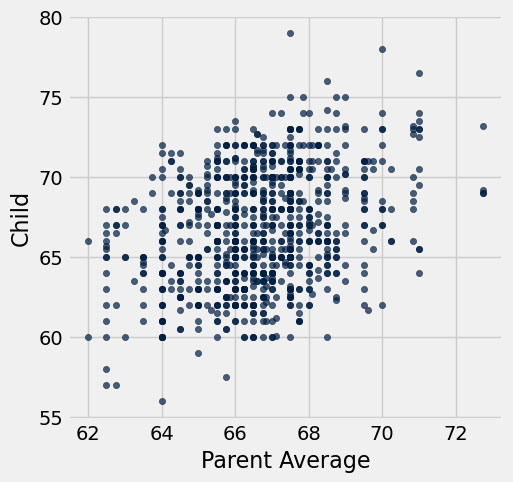

In [38]:
# run the scatter plot for Parent Average
heights.scatter('Parent Average')

# Drawing lines on a plot
Sometimes you may want to draw lines on graph to do this use the code format below.
```
plots.plot([x1, x2], [y1, y2], color='color', lw=linewidth)
```
You many want to plot a point using the code below
```
plots.scatter(x, y, color='color', s=size of point)
```
Draw two lines on the graph above that are red and width of 3

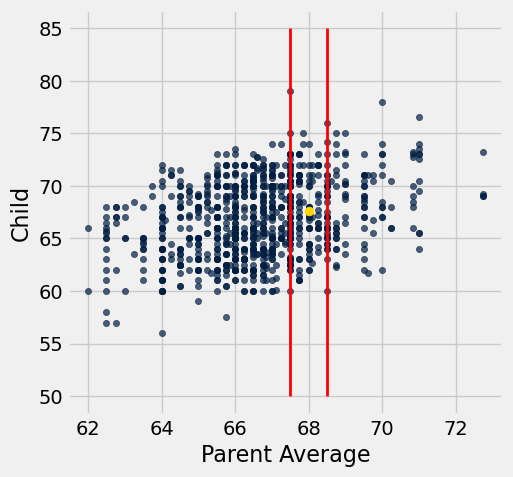

In [39]:
# create a scatterplot with lines
heights.scatter('Parent Average')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 67.62, color='gold', s=40);

# Single Grouping
To group by a single variable you use the group method and one the functions to summarize the data.
```
table_name.group('column_name')  # displays the counts in each group
    
table_name.group('column_name', sum)        # built-in function
    
table_name.group('column_name', len)        # built-in function
    
table_name.group('column_name', min)        # built-in function
    
table_name.group('column_name', max)        # built-in function
    
table_name.group('column_name', np.average)  # numpy function
    
table_name.group('column_name', np.mean)     # numpy function
    
table_name.group('column_name', np.std)      # numpy function
    
table_name.group('column_name', np.median)   # numpy function
```

In [41]:
# read in data
nba = Table.read_table('nba_salaries.csv').where('season',are.equal_to(2015))
nba


rank,name,position,team,salary,season
1,Kobe Bryant,SF,Los Angeles Lakers,23500000,2015
2,Joe Johnson,G,Brooklyn Nets,23180790,2015
3,Carmelo Anthony,PF,New York Knicks,22458401,2015
4,Dwight Howard,C,Houston Rockets,21436271,2015
5,Chris Bosh,PF,Miami Heat,20644400,2015
6,LeBron James,SF,Cleveland Cavaliers,20644400,2015
7,Chris Paul,PG,LA Clippers,20068563,2015
8,Deron Williams,PG,Brooklyn Nets,19754465,2015
9,Rudy Gay,SF,Sacramento Kings,19317326,2015
10,Kevin Durant,SF,Oklahoma City Thunder,18995624,2015


In [43]:
teams_and_money = nba.select('team', 'salary')
teams_and_money

team,salary
Los Angeles Lakers,23500000
Brooklyn Nets,23180790
New York Knicks,22458401
Houston Rockets,21436271
Miami Heat,20644400
Cleveland Cavaliers,20644400
LA Clippers,20068563
Brooklyn Nets,19754465
Sacramento Kings,19317326
Oklahoma City Thunder,18995624


In [47]:
# select team and salary from the nba table and call it teams_and_money
# group salaries by teams
teams_and_money = nba.select('team', 'salary')
x = teams_and_money.group('team', sum)
x.set_format([1], NumberFormatter)

team,salary sum
Atlanta Hawks,"57,182,724"
Boston Celtics,"41,359,670"
Brooklyn Nets,"103,134,468"
Charlotte Hornets,"68,876,214"
Chicago Bulls,"69,857,980"
Cleveland Cavaliers,"67,757,418"
Dallas Mavericks,"76,045,171"
Denver Nuggets,"57,074,915"
Detroit Pistons,"43,963,633"
Golden State Warriors,"74,947,574"


In [48]:
#How many NBA players were there in each of the five positions?
nba.select('position').group('position')



position,count
C,97
F,43
G,49
PF,93
PG,78
SF,79
SG,88


In [49]:
#  What was the average salary of the players at each of the five positions?
positions_and_money = nba.select('position', 'salary')
positions_and_money.group('position', np.mean)

position,salary mean
C,4.52468e+06
F,3.10895e+06
G,4.13679e+06
PF,4.15431e+06
PG,3.96889e+06
SF,3.65802e+06
SG,3.37298e+06


# Grouping more than one column
You can group the elements of two columns using the group method.
```
table.group(['column1', 'column2'])  # result in counts for unique combinations
table.group(['column1', 'column2'], function) # finds the function of each unique combination
```
There is another method to create a contingency table of two columns it is called Pivot.  To find the pivot use the code below.  The pivot always takes two column labels, one to determine the columns and one to determine the rows.
```
table_name.pivot('column1', 'column2', values = 'column3', collect = function)
```
The functions are the same ones mentioned for the group method.

In [50]:
# create a table
more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

more_cones


Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [51]:
# group and show the count
more_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [53]:
# group and show the sum
more_cones.group(['Flavor', 'Color'],sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


In [54]:
# group and show the mean price
more_cones.group(['Flavor', 'Color'],np.mean)

Flavor,Color,Price mean
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,4.4


In [55]:
# Pivot and show sum of price in contingency table
more_cones.pivot('Flavor', 'Color', values='Price', collect =sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


In [56]:
# Pivot and show mean price
more_cones.pivot('Flavor', 'Color', values='Price', collect =np.mean)

Color,bubblegum,chocolate,strawberry
dark brown,0,5.25,0
light brown,0,4.75,0
pink,4.75,0,4.4


In [58]:
#  Read in educ_inc.ccsv to table full_table variable and display it 
full_table = Table.read_table('educ_inc.csv')
full_table

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
1/1/08 0:00,00 to 17,Male,No high school diploma,"F: 35,000 to 49,999",2227
1/1/08 0:00,00 to 17,Male,No high school diploma,"E: 25,000 to 34,999",2606
1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","D: 15,000 to 24,999",3465
1/1/08 0:00,00 to 17,Male,No high school diploma,"D: 15,000 to 24,999",3974
1/1/08 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",4233


In [59]:
#  Read educ_inc.csv table into full_table variable 
# Select Year equal to '1/1/14 0:00'
# Age not equal to  '00 to 17'
# Assign it to variable ca_2014
#
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17'))
ca_2014

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/14 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
1/1/14 0:00,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
1/1/14 0:00,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
1/1/14 0:00,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
1/1/14 0:00,65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
1/1/14 0:00,65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
1/1/14 0:00,18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
1/1/14 0:00,65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
1/1/14 0:00,65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
1/1/14 0:00,65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


# Textbook Pivots Examples
Each row of the table, full_table corresponds to a combination of age, gender, educational level, and income. There are 127 such combinations in all!


In [60]:
educ_inc = ca_2014.select('Educational Attainment', 'Personal Income', 'Population Count')
educ_inc

Educational Attainment,Personal Income,Population Count
No high school diploma,"H: 75,000 and over",2058
No high school diploma,"H: 75,000 and over",2153
No high school diploma,"G: 50,000 to 74,999",4666
High school or equivalent,"H: 75,000 and over",7122
No high school diploma,"F: 35,000 to 49,999",7261
No high school diploma,"G: 50,000 to 74,999",8569
No high school diploma,"G: 50,000 to 74,999",14635
No high school diploma,"F: 35,000 to 49,999",15212
"College, less than 4-yr degree","B: 5,000 to 9,999",15423
Bachelor's degree or higher,"A: 0 to 4,999",15459


In [61]:
# Select two columns 'Educational Attainment' and 'Population Count' from educ_inc
# Put it in a variable called education
# Group education by 'Educational Attainment' apply the sum to Populaton Count


education = educ_inc.select('Educational Attainment', 'Population Count')
educ_totals = education.group('Educational Attainment', sum)
educ_totals

Educational Attainment,Population Count sum
Bachelor's degree or higher,8525698
"College, less than 4-yr degree",7775497
High school or equivalent,6294141
No high school diploma,4258277


In [62]:
# define a function called percents that sums the total array and divides each
# element by the total then multiplies the result by 100 and rounds to 2 decimal places

def percents(array_x):
    """finding the percentage of each element in the array"""
    return np.round( (array_x/sum(array_x))*100, 2)

In [63]:
# Create a table with columns Population Percent with the ed
educ_distribution = educ_totals.with_column(
    'Population Percent', percents(educ_totals.column(1))
)
educ_distribution

Educational Attainment,Population Count sum,Population Percent
Bachelor's degree or higher,8525698,31.75
"College, less than 4-yr degree",7775497,28.96
High school or equivalent,6294141,23.44
No high school diploma,4258277,15.86


In [64]:
# Use the pivot function on 'Educational Attainment' and 'Personal Income' by 
# sum of Population Count put in variable called totals

totals = educ_inc.pivot('Educational Attainment', 'Personal Income', values='Population Count', collect=sum)
totals

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


In [65]:
# Create a table called distributions using the pivot table totals
# Fields 'Bachelor's degree or higher' create percents using totals column 1
# Fields 'College, less than 4-year degree percents using totals column 2
# Fields 'High school or equivalent' using percents totals column 3
# Fields 'No high school diploma' using percents totals column 4
# display distributions
distributions = totals.select(0).with_columns(    "Bachelor's degree or higher", percents(totals.column(1)),
    'College, less than 4-yr degree', percents(totals.column(2)),
    'High school or equivalent', percents(totals.column(3)),
    'No high school diploma', percents(totals.column(4))   
    )
distributions

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",6.75,12.67,18.46,28.29
"B: 5,000 to 9,999",3.82,10.43,9.95,14.02
"C: 10,000 to 14,999",5.31,10.27,11,15.61
"D: 15,000 to 24,999",9.07,17.3,19.9,20.56
"E: 25,000 to 34,999",8.14,14.04,14.76,10.91
"F: 35,000 to 49,999",13.17,14.31,12.44,6.12
"G: 50,000 to 74,999",18.7,11.37,8.35,3.11
"H: 75,000 and over",35.03,9.62,5.13,1.38


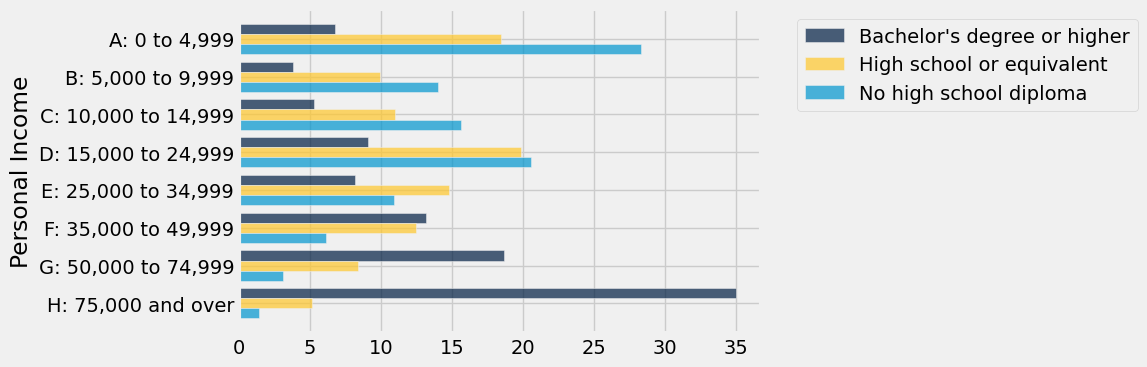

In [66]:
# create a barchart of distributions
distributions.select(0, 1,3, 4).barh(0)

# Joining Tables
Some times you come across data that is stored in two tables.  One table has some of the information you want and another table has other information you want.  In tha case you must connect the table to get the information from both tables.  Each table has a column in common.  It may or may not have the same name.  Use the format below to join the tables.
```
table1.join(table1_column_for_joining, table2, table2_column_for_joining)
```



In [67]:
# Create a table of ice creams called cones
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'vanilla', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.75)
)
cones

Flavor,Price
strawberry,3.55
vanilla,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.75


In [68]:
ratings = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'vanilla'),
    'Stars', make_array(2.5, 3.5, 4)
)
ratings

Kind,Stars
strawberry,2.5
chocolate,3.5
vanilla,4


In [69]:
rated = cones.join('Flavor', ratings, 'Kind')
rated

Flavor,Price,Stars
chocolate,6.55,3.5
chocolate,5.75,3.5
strawberry,3.55,2.5
strawberry,5.25,2.5
vanilla,4.75,4


In [70]:
rated.with_column('$/Star', rated.column('Price')/rated.column('Stars')).sort(3)

Flavor,Price,Stars,$/Star
vanilla,4.75,4,1.1875
strawberry,3.55,2.5,1.42
chocolate,5.75,3.5,1.64286
chocolate,6.55,3.5,1.87143
strawberry,5.25,2.5,2.1


In [71]:
ratings

Kind,Stars
strawberry,2.5
chocolate,3.5
vanilla,4


In [72]:
ratings.join('Kind', cones, 'Flavor')

Kind,Stars,Price
chocolate,3.5,6.55
chocolate,3.5,5.75
strawberry,2.5,3.55
strawberry,2.5,5.25
vanilla,4,4.75


In [73]:
reviews = Table().with_columns(
    'Flavor', make_array('vanilla', 'chocolate', 'vanilla', 'chocolate'),
    'Stars', make_array(5, 3, 5, 4)
)
reviews

Flavor,Stars
vanilla,5
chocolate,3
vanilla,5
chocolate,4


In [74]:
average_review = reviews.group('Flavor', np.average)
average_review

Flavor,Stars average
chocolate,3.5
vanilla,5


In [75]:
cones.join('Flavor', average_review, 'Flavor')

Flavor,Price,Stars average
chocolate,6.55,3.5
chocolate,5.75,3.5
vanilla,4.75,5


In [76]:
trips = Table.read_table('trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


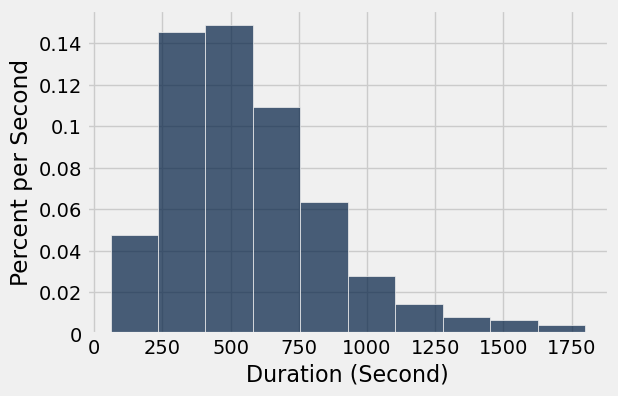

In [77]:
commute = trips.where('Duration', are.below(1800))
commute.hist('Duration', unit='Second')

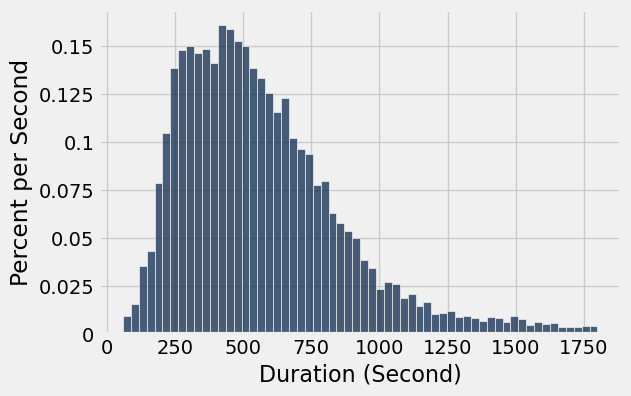

In [78]:
commute.hist('Duration', bins=60, unit='Second')

In [79]:
# Select start station 
starts = commute.group('Start Station').sort('count', descending=True)
starts


Start Station,count
San Francisco Caltrain (Townsend at 4th),1140
San Francisco Caltrain 2 (330 Townsend),1133
2nd at Townsend,796
Harry Bridges Plaza (Ferry Building),764
Temporary Transbay Terminal (Howard at Beale),755
Steuart at Market,752
Embarcadero at Sansome,689
Townsend at 7th,642
Market at Sansome,548
Market at 10th,500


In [80]:
commute.group(['Start Station', 'End Station'])

Start Station,End Station,count
2nd at Folsom,2nd at South Park,18
2nd at Folsom,2nd at Townsend,27
2nd at Folsom,5th at Howard,3
2nd at Folsom,Beale at Market,2
2nd at Folsom,Broadway St at Battery St,3
2nd at Folsom,Civic Center BART (7th at Market),9
2nd at Folsom,Clay at Battery,13
2nd at Folsom,Commercial at Montgomery,18
2nd at Folsom,Davis at Jackson,3
2nd at Folsom,Embarcadero at Bryant,5


In [81]:
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,0,6,36,5,0,0,2,2,0,0,3,2,9,0,0,2,3,1,0,0,0,0,0,41,2,0,0,6,1,21,3,0,0,0,0,0,0,2,4,2,0,0,0,0,0,0,0,0,0,32,23,4,0,0,0,0,0,0,0,0,1,1,0,0,1,15,19,0,0,0
2nd at South Park,18,5,10,8,0,0,17,5,0,0,1,2,6,0,1,5,17,5,4,0,0,3,1,46,13,0,0,2,7,90,1,0,0,0,0,0,0,16,1,6,0,0,0,0,0,0,0,0,0,8,17,2,0,0,0,0,0,0,0,0,3,6,0,0,16,14,8,0,12,5
2nd at Townsend,27,14,9,9,0,0,40,15,0,0,6,16,2,0,26,21,46,26,14,0,0,3,9,116,19,0,0,22,16,49,15,0,0,0,0,0,0,5,7,14,0,0,0,0,0,0,0,0,0,53,19,0,0,0,0,0,0,0,0,0,3,21,0,0,133,50,38,0,8,8
5th at Howard,3,5,6,2,0,0,3,6,0,0,13,2,5,0,3,2,0,1,1,0,0,4,1,16,19,0,0,13,14,4,3,0,0,0,0,0,0,17,8,3,0,0,0,0,0,0,0,0,0,26,69,2,0,0,0,0,0,0,0,0,2,4,0,0,16,32,6,0,3,3
Adobe on Almaden,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,1,3,12,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0
Beale at Market,2,4,12,0,0,0,1,25,0,0,22,3,5,0,5,6,3,30,7,0,0,15,18,3,2,0,0,18,6,7,0,0,0,0,0,0,0,2,10,7,0,0,0,0,0,0,0,0,0,27,24,3,0,0,0,0,0,0,0,0,21,1,0,0,0,23,0,0,5,1
Broadway St at Battery St,3,4,14,7,0,0,39,5,0,0,1,5,3,0,2,7,1,13,1,0,0,2,3,8,1,0,0,0,3,8,7,0,0,0,0,0,0,8,6,2,0,0,0,0,0,0,0,0,0,21,21,0,0,0,0,0,0,0,0,0,0,7,0,0,25,28,1,0,1,0
California Ave Caltrain Station,0,0,0,0,0,0,0,0,7,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
commute.pivot('Start Station', 'End Station', 'Duration', min)

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,0,125,164,276,0,0,355,431,0,0,587,376,345,0,0,436,339,817,0,0,0,0,0,316,111,0,0,537,315,207,261,0,0,0,0,0,0,240,370,375,0,0,0,0,0,0,0,0,0,323,342,1080,0,0,0,0,0,0,0,0,1063,214,0,0,501,167,485,0,0,0
2nd at South Park,102,71,90,359,0,0,354,555,0,0,620,617,425,0,646,230,328,630,626,0,0,640,611,438,199,0,0,680,506,260,511,0,0,0,0,0,0,289,585,345,0,0,0,0,0,0,0,0,0,271,201,658,0,0,0,0,0,0,0,0,819,294,0,0,393,321,322,0,691,279
2nd at Townsend,137,68,80,481,0,0,313,513,0,0,652,579,809,0,539,207,288,545,530,0,0,930,598,393,246,0,0,672,393,318,560,0,0,0,0,0,0,319,605,512,0,0,0,0,0,0,0,0,0,149,164,0,0,0,0,0,0,0,0,0,849,253,0,0,393,268,289,0,610,421
5th at Howard,265,310,500,73,0,0,514,581,0,0,199,543,541,0,543,534,0,843,842,0,0,347,839,507,171,0,0,308,182,409,494,0,0,0,0,0,0,251,108,282,0,0,0,0,0,0,0,0,0,284,259,556,0,0,0,0,0,0,0,0,380,491,0,0,483,336,364,0,556,147
Adobe on Almaden,0,0,0,0,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,320,0,0,0,0,0,0,0,0,607,595,0,0,0,0,0,427,165,235,0,258,513,0,0,0,0,0,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,305,174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,524,0,0,0,0,165,0,0,0,0,0,0,0,0,0,0
Beale at Market,243,474,476,0,0,0,72,160,0,0,431,130,178,0,145,256,176,347,198,0,0,437,289,245,265,0,0,568,208,108,0,0,0,0,0,0,0,276,395,191,0,0,0,0,0,0,0,0,0,517,522,705,0,0,0,0,0,0,0,0,625,356,0,0,0,110,0,0,251,481
Broadway St at Battery St,619,664,535,720,0,0,248,62,0,0,717,164,157,0,105,363,409,189,255,0,0,1216,260,280,416,0,0,0,506,281,315,0,0,0,0,0,0,369,629,579,0,0,0,0,0,0,0,0,0,682,599,0,0,0,0,0,0,0,0,0,0,399,0,0,227,365,1296,0,270,0
California Ave Caltrain Station,0,0,0,0,0,0,0,0,162,0,0,0,0,1007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,484,151,0,0,0,0,0,0,0,1276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,624,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,264,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
stations = Table.read_table('station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


# Drawing Maps

Given the longitude and latitude Python can draw maps.  
```
Marker.map_table(stations.select('lat', 'long', 'name').relabel('name', 'labels'))
```

In [84]:
Marker.map_table(stations.select('lat', 'long', 'name').relabel('name', 'labels'))

In [85]:
sf = stations.where('landmark', are.equal_to('San Francisco'))
sf_map_data = sf.select('lat', 'long', 'name').relabel('name', 'labels')
Circle.map_table(sf_map_data, color='green')

In [86]:
cities = stations.group('landmark').relabeled('landmark', 'city')
cities

city,count
Mountain View,7
Palo Alto,5
Redwood City,7
San Francisco,35
San Jose,16


In [87]:
colors = cities.with_column('color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

city,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [88]:
joined = stations.join('landmark', colors, 'city')
colored = joined.select('lat', 'long', 'name', 'color').relabel('name', 'labels')
Marker.map_table(colored)

In [89]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),1140
San Francisco Caltrain 2 (330 Townsend),1133
2nd at Townsend,796
Harry Bridges Plaza (Ferry Building),764
Temporary Transbay Terminal (Howard at Beale),755
Steuart at Market,752
Embarcadero at Sansome,689
Townsend at 7th,642
Market at Sansome,548
Market at 10th,500


In [90]:
station_starts = stations.join('name', starts, 'Start Station')
station_starts

name,station_id,lat,long,dockcount,landmark,installation,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,397
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,403
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,796
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,328
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,27
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,23
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,405
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,324
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,22
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,67


In [91]:
starts_map_data = station_starts.select('lat', 'long', 'name').with_columns(
    'colors', 'blue',
    'areas', station_starts.column('count') * 0.3
)
starts_map_data.show(3)
Circle.map_table(starts_map_data.relabel('name', 'labels'))

lat,long,name,colors,areas
37.7853,-122.396,2nd at Folsom,blue,119.1
37.7823,-122.393,2nd at South Park,blue,120.9
37.7805,-122.39,2nd at Townsend,blue,238.8
